In [1]:
# philip walsh
# philipwalsj.ds@gmail.com
# 2019-12-21
# Digit Recognizer from https://www.kaggle.com/c/digit-recognizer/data
# in this file i am specifically trying to remove some of the fuzz that ma be cluttering up the images



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
import winsound
def alert_me(num_beeps):
    frequency = 2500  # Set Frequency To 2500 Hertz
    duration = 500  # Set Duration To 1000 ms == 1 second

    for n in range(1,num_beeps+1):
        winsound.Beep(frequency, duration)



In [20]:
 
np.floor(255/10)*10

250.0

In [23]:
def remove_the_fuzz(any_num):
    retval = int(any_num)
    if int(any_num) < 200:
        retval=0
    return retval

In [5]:
train_data = pd.read_csv("excluded/train.csv")

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label_df=train_data[['label']]

In [8]:
train_data.drop('label', axis=1, inplace=True)

In [9]:
label_df['label'].head(4)

0    1
1    0
2    1
3    4
Name: label, dtype: int64

In [10]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def char_to_ascii(any_char):
    return ord(str(any_char))

In [11]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def ascii_to_char(any_num):
    return chr(any_num)

In [12]:
chr(52)

'4'

In [13]:
ascii_df = label_df['label'].apply(char_to_ascii)

In [14]:
ascii_df.head(4)

0    49
1    48
2    49
3    52
Name: label, dtype: int64

In [26]:
defuzzed_df = train_data.copy()

In [37]:
defuzzed_df=defuzzed_df.applymap(lambda x: x>200)

In [38]:
defuzzed_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#
#check it out!!!!!!
#

In [39]:
my_empty_cols=defuzzed_df.columns[(defuzzed_df == False).all()]
my_empty_cols

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel757', 'pixel758', 'pixel759', 'pixel760', 'pixel761', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=138)

In [41]:
defuzzed_df

,pixel13,pixel14,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,...,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
defuzzed_df=defuzzed_df.applymap(lambda x: int(x))

In [44]:
defuzzed_df

,pixel13,pixel14,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,...,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(defuzzed_df, ascii_df, test_size=0.20, random_state=9261774)

In [46]:
X_train.shape,y_train.shape

((33600, 646), (33600,))

In [47]:
X_test.shape, y_test.shape

((8400, 646), (8400,))

In [48]:
# take the best score, and plop it into here
best_k=4

In [49]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [50]:
# predict against the train data to find the residuals

In [51]:
predicted = knn.predict(X_train)

In [52]:
alert_me(2)

In [53]:
expected = y_train

In [54]:
pd.DataFrame(y_train).head()

,label
41960,49
6974,55
17977,51
23002,50
23953,48


In [55]:
pd.DataFrame(predicted).head()

,0
0,49
1,55
2,51
3,50
4,48


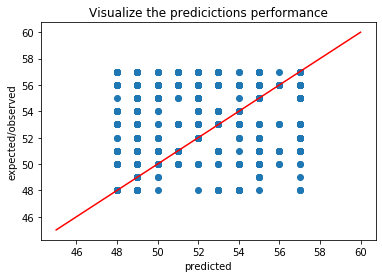

In [56]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([45,60],[45,60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

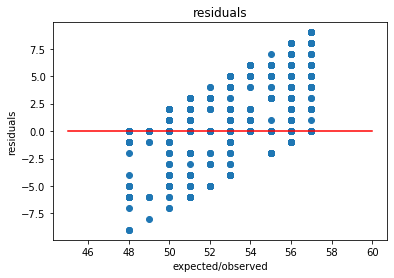

In [57]:
residuals = np.array(expected.values.ravel()) - predicted
plt.title('residuals')
plt.xlabel('expected/observed')
plt.ylabel('residuals')
plt.plot([45,60],[0,0], color='red')
plt.scatter(expected, residuals)
# a good residual plot does not have a pattern

In [58]:
# now predict it against the test data, find our errors

In [59]:
predicted = knn.predict(X_test)

In [60]:
pd.DataFrame(predicted).head()

,0
0,53
1,49
2,56
3,50
4,57


In [61]:
expected = y_test

In [62]:
pd.DataFrame(expected).head()

,label
31849,53
34362,49
28860,56
572,50
33572,57


In [63]:
alert_me(2)

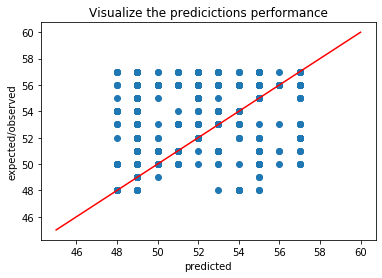

In [64]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([45,60],[45,60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

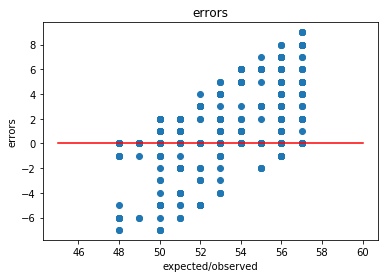

In [65]:
errors = np.array(expected.values.ravel()) - predicted
plt.title('errors')
plt.xlabel('expected/observed')
plt.ylabel('errors')
plt.plot([45,60],[0,0], color='red')
plt.scatter(expected, errors)
# a good error plot does not have a pattern

In [ ]:
# lets predict the submission data

In [66]:
test_data = pd.read_csv("excluded/test.csv")

In [67]:
defuzzed_df = test_data.copy()
for n in my_empty_cols:
    defuzzed_df.drop(n, axis=1, inplace=True)
defuzzed_df=defuzzed_df.applymap(lambda x: x>200)
defuzzed_df=defuzzed_df.applymap(lambda x: int(x))

In [68]:
defuzzed_df

,pixel13,pixel14,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,...,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predicted = knn.predict(defuzzed_df)

In [ ]:
pd.DataFrame(predicted).head()

In [ ]:
#tack the saved labes (y's) onto the preds into a data frame
pred_rf=pd.DataFrame(predicted, columns=['ascii'])

In [ ]:
pred_rf.head()

In [ ]:
submission_df = pd.DataFrame(pred_rf['ascii'].apply(ascii_to_char))
submission_df.head()

In [ ]:
submission_df.index += 1

In [ ]:
submission_df['ImageId'] = submission_df.index

In [ ]:
submission_df.columns=['Label','ImageId']
submission_df.head()

In [ ]:
submission_df[['ImageId','Label']].to_csv('excluded/knn-test-2-submission.csv',index=False)